## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep_course,math_score,reading_score,writing_score
0,male,group A,master's degree,free/reduced,none,67,70,99
1,male,group E,some high school,standard,none,59,99,39
2,male,group B,some college,standard,none,51,46,49
3,male,group B,master's degree,standard,none,53,96,62
4,male,group E,some college,standard,none,83,73,73


#### Preparing X and Y variables

In [6]:
X = df.drop(columns=['math_score'],axis=1)

In [7]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_prep_course,reading_score,writing_score
0,male,group A,master's degree,free/reduced,none,70,99
1,male,group E,some high school,standard,none,99,39
2,male,group B,some college,standard,none,46,49
3,male,group B,master's degree,standard,none,96,62
4,male,group E,some college,standard,none,73,73


In [8]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_prep_course'].unique())

Categories in 'gender' variable:      ['male' 'female']
Categories in 'race_ethnicity' variable:   ['group A' 'group E' 'group B' 'group D' 'group C']
Categories in'parental level of education' variable: ["master's degree" 'some high school' 'some college' "bachelor's degree"
 "associate's degree" 'high school']
Categories in 'lunch' variable:      ['free/reduced' 'standard']
Categories in 'test preparation course' variable:      ['none' 'complete']


In [9]:
y = df['math_score']

In [10]:
y

0      67
1      59
2      51
3      53
4      83
       ..
195    87
196    52
197    63
198    59
199    65
Name: math_score, Length: 200, dtype: int64

In [11]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [14]:
X

array([[ 0.        ,  1.        ,  1.        , ...,  1.        ,
         0.2950876 ,  1.53252403],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
         1.75541875, -1.38148141],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.91346231, -0.89581384],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.54686884,  0.02695455],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.74829382, -1.33291465],
       [ 0.        ,  1.        ,  1.        , ...,  1.        ,
         0.24473136,  0.07552131]])

In [15]:
X.shape

(200, 19)

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((160, 19), (40, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 17.8603
- Mean Absolute Error: 15.1655
- R2 Score: 0.1299
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 24.1848
- Mean Absolute Error: 19.8760
- R2 Score: -0.1537


Lasso
Model performance for Training set
- Root Mean Squared Error: 18.6960
- Mean Absolute Error: 16.2516
- R2 Score: 0.0466
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 22.9315
- Mean Absolute Error: 19.5519
- R2 Score: -0.0372


Ridge
Model performance for Training set
- Root Mean Squared Error: 17.8617
- Mean Absolute Error: 15.1894
- R2 Score: 0.1298
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 24.1034
- Mean Absolute Error: 19.8085
- R2 Score: -0.1460


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 17.9844
- Mean Absolute Error: 15.3900
- R2 Score: 0.1178
------

### Results

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,Lasso,-0.037243
3,K-Neighbors Regressor,-0.052860
2,Ridge,-0.145965
0,Linear Regression,-0.153718
5,Random Forest Regressor,-0.260977
8,AdaBoost Regressor,-0.274619
7,CatBoosting Regressor,-0.368205
6,XGBRegressor,-0.772332
4,Decision Tree,-1.235764


## Linear Regression

In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is -15.37


## Plot y_pred and y_test

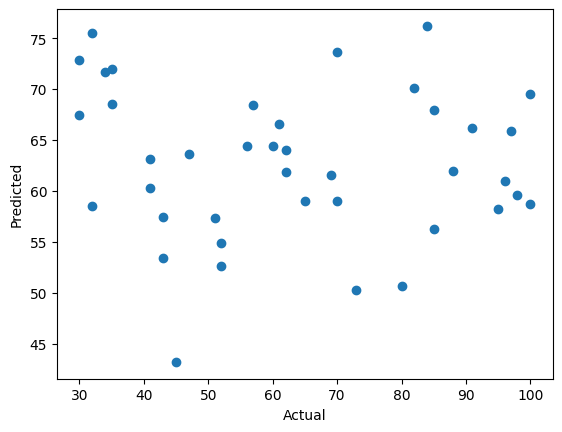

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

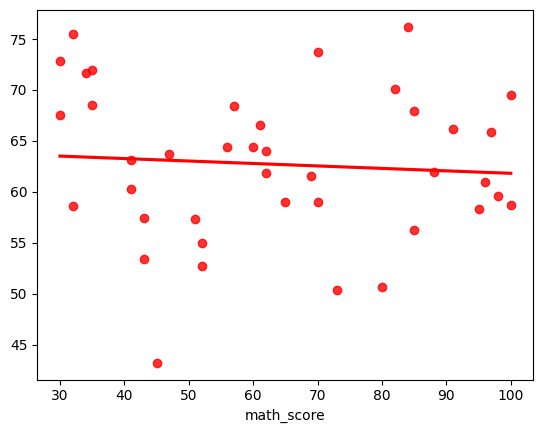

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
95,69,61.575374,7.424626
15,70,73.684622,-3.684622
30,41,63.159044,-22.159044
158,96,60.981263,35.018737
128,35,68.552219,-33.552219
115,62,64.018958,-2.018958
69,95,58.263892,36.736108
170,60,64.416904,-4.416904
174,85,56.263891,28.736109
45,100,69.498218,30.501782
